OSCILLATION OF MOTION OF PENDULUM

Damped Pendulumn
The code below is for damped motion. This means, the motion of the oscillator reduces due to an external force. 
We will use the second order differential equation.

This code defines a function damp_Pen() that takes in theta, t, damping coefficient b, acceleration due to gravity g, length of the pendulum l and mass of the bob m as inputs and returns the first derivative of theta and angular velocity.
It then defines the initial conditions for the pendulum, the time step and the time array, it uses the ODEINT function to solve the differential equation and integrate the solution over time.
Finally it plots the angular displacement as a function of time using the matplotlib library.

In [ ]:
import numpy as np
from scipy.integrate import odeint
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from time import perf_counter
from PIL import Image
from functools import partial
import requests
import os
from scipy.integrate import odeint


array([<Axes: xlabel='Time', ylabel='Amplitude'>,
       <Axes: xlabel='Time', ylabel='Amplitude'>], dtype=object)

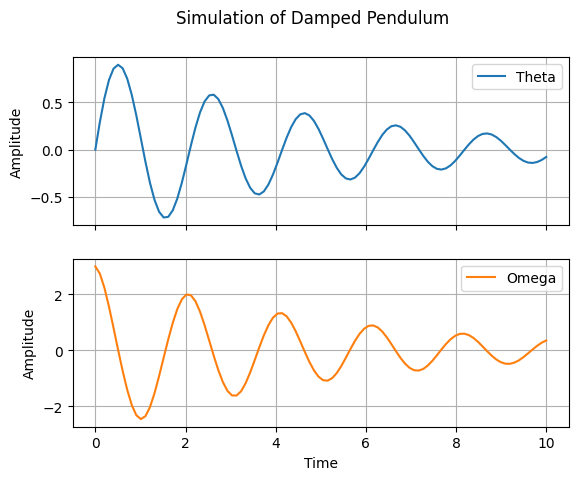

In [ ]:
def damp_Pen(x0, t, b, g, l,m):
    theta=x0[0]
    omega=x0[1]
    theta_dot=omega
    omega_dot=-((b/m)*(omega))-((g/l)*math.sin(theta));
    x_dot=[theta_dot,omega_dot]
    return x_dot

#the damping coeffiecient
b=0.02  

#acceleration due gravity
g= 9.81 

#the length of the string
l= 1 

#the mass of the bob
m= 0.05 

#iniial conditions
x0=[0,3]
t=np.linspace(0,10,100)

#solving the ODE
x = odeint(damp_Pen,x0,t,args=(b,g,l,m))

# Plot the results
results = pd.DataFrame({'Time': t, 'Theta': x[:,0], 'Omega': x[:,1]})
results = results.set_index('Time')    
results.to_csv('pendulum_data.csv', index=['Time'])
results.plot(subplots=True, grid=True, title='Simulation of Damped Pendulum', ylabel='Amplitude')

In [ ]:
# Load the data
data = pd.read_csv('pendulum_data.csv')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Time'], data['Theta'], test_size=0.2)

# Reshape the data 
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [ ]:
# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)


Mean squared error:  0.1468463197974761


In [ ]:
# Create the model
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test, y_test, batch_size=32)
print('Mean squared error: ', mse)


Epoch 1/200
3/3 [==============================] - 1s 7ms/step - loss: 0.1926
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1366
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1160
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1157
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1229
Epoch 6/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1236
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1190
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1136
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 10/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1143
Epoch 11/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1146
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 0.1137
Epoch 13/200
3/3 [==============================] - 0s 3ms/st

This code defines the function pendulum() which takes in the variables y, t, l and g as input and returns the first derivative of theta and angular velocity.
It then defines the initial conditions for the pendulum, the time step and the time array, it uses the ODEINT function to solve the differential equation and integrate the solution over time.
It then plots the angular displacement as a function of time using the matplotlib library.
The initial angle, angular velocity and length of the pendulum can be adjusted to see the effect of these parameters on the motion of the pendulum.

array([<Axes: xlabel='Time', ylabel='Amplitude'>,
       <Axes: xlabel='Time', ylabel='Amplitude'>], dtype=object)

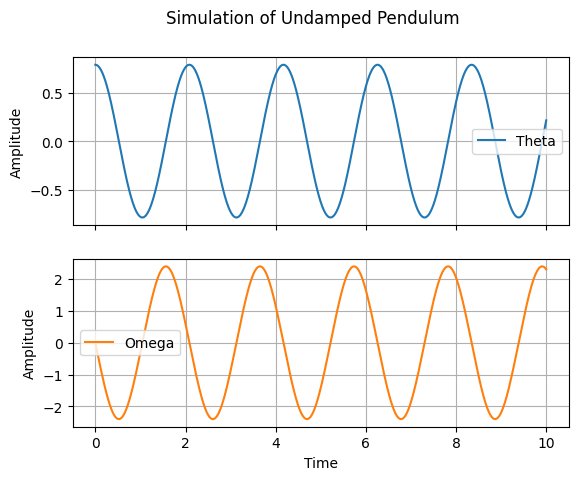

In [ ]:
# Define the pendulum dynamics
def pendulum(y, t, l, g):
    theta, omega = y
    dydt = [omega, -(g/l)*np.sin(theta)]
    return dydt

# Initial conditions
theta_0 = np.pi/4 # initial angle
omega_0 = 0 # initial angular velocity
y_0 = [theta_0, omega_0]

# Simulation parameters
l = 1 # length of pendulum
g = 9.81 # acceleration due to gravity
t = np.linspace(0, 10, 1000) # time

# Solve the ODE
sol = odeint(pendulum, y_0, t, args=(l, g))

# Plot the results
results = pd.DataFrame({'Time': t, 'Theta': sol[:,0], 'Omega': sol[:,1]})
results = results.set_index('Time')    
results.plot(subplots=True, grid=True, title='Simulation of Undamped Pendulum', ylabel='Amplitude')

In [ ]:
# Define the pendulum dynamics
def pendulum(theta, t, l, g):
    omega = -(g/l)*np.sin(theta)
    return omega

# Create training data
l = 1 # length of pendulum
g = 9.81 # acceleration due to gravity
theta_values = np.linspace(0, np.pi, 100) # angles
t_values = np.linspace(0, 10, 100) # time
omega_values = pendulum(theta_values, t_values, l, g) # angular velocity

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(theta_values.reshape(-1, 1))
y_train = omega_values

# Build the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=1, activation='gelu'))
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1000)

# Predict angular velocity for a given angle
theta_test = scaler.transform(np.array([[np.pi/4]]) )
omega_pred = model.predict(theta_test)
print("Predicted angular velocity:", omega_pred)

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 47.0879
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 46.6932
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 46.2945
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 45.9071
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 45.5020
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 45.1041
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 44.7046
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 44.3142
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 43.9066
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 43.5218
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 43.1215
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 42.7256
Epoch 13/1000
4/4 [==================

1/1 [==============================] - 0s 69ms/step
Predicted angular velocity: [[-7.3621893]]


In [ ]:
## let's import the relevant libraries
import torch
import torch.nn as nn
from time import perf_counter
from PIL import Image
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
import requests
import os

## check if GPU is available and use it; otherwise use CPU
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [ ]:
# N is a Neural Network - This is exactly the network used by Lagaris et al. 1997
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

# Initial condition
A = 0.

# The Psi_t function
Psi_t = lambda x: A + x * N(x)

# The right hand side function
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

# The loss function
def loss(x):
    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                                  create_graph=True)[0]
    return torch.mean((Psi_t_x - f(x, outputs)) ** 2)

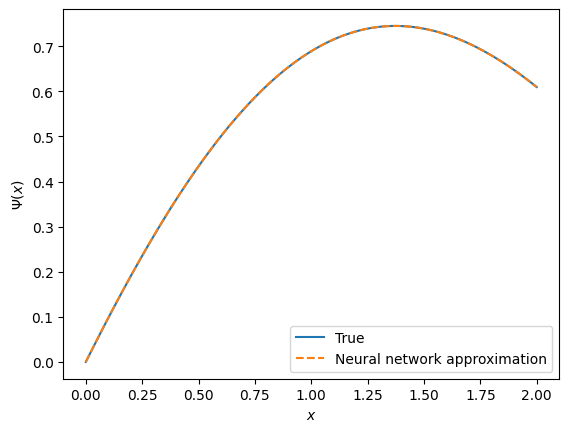

In [ ]:
# Optimize (same algorithm as in Lagaris)
optimizer = torch.optim.LBFGS(N.parameters())

# The collocation points used by Lagaris
x = torch.Tensor(np.linspace(0, 2, 100)[:, None])

# Run the optimizer
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l
    
for i in range(10):
    optimizer.step(closure)

# Let's compare the result to the true solution
xx = np.linspace(0, 2, 100)[:, None]
with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$\Psi(x)$')
plt.legend(loc='best');